# Exercise 1-3: Comparison between TRG and MCMC
2020, July, Tsuyoshi Okubo  
2021, July, Tsuyoshi Okubo  
2023, March, Tsuyoshi Okubo

This code compares the obaservables obtained by TRG and MCMC for 2d Ising model on the square lattice, whose Hamiltonian is given by
 $$ \mathcal{H} = -J \sum_{\langle i,j\rangle} S_i S_j$$
where $S_i = \pm 1$. 

We read data calculated in the previous exercises and plot them.

In [1]:
import numpy as np
import pickle
import os

%matplotlib inline
from matplotlib import pyplot

In [21]:
## plot temperature range
T_min = 2.1
T_max = 2.4

## data file
mc_data = "mcdata_ex0-2.dat" ## MC simulation data
trg_data = "trgdata_ex1-2_D4.dat" ## MC simulation data

## when the above files do not exist, we try to download default data from github
if not os.path.exists(mc_data):
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/outputs/mc_output/mcdata_ex0-3.dat
    mc_data = "mcdata_ex0-3.dat"
if not os.path.exists(trg_data):
    !wget https://raw.githubusercontent.com/TsuyoshiOkubo/Introduction-to-Tensor-Network/main/Exercise/outputs/trg_output/trgdata_ex1-2_D4.dat
    trg_data = "trgdata_ex1-2_D4.dat"

In [22]:
## read data
## MC data
f = open(mc_data,"rb")
obs_list_all = pickle.load(f)
f.close

Ene_all_mc = obs_list_all[0]
Ene_err_all_mc = obs_list_all[1]
Mag2_all_mc = obs_list_all[2]
Mag2_err_all_mc = obs_list_all[3]
Mag2_imp_all_mc = obs_list_all[4]
Mag2_imp_err_all_mc = obs_list_all[5]

Binder_all_mc = obs_list_all[6]
Binder_err_all_mc = obs_list_all[7]
C_all_mc = obs_list_all[8]
C_err_all_mc = obs_list_all[9]
Chi_all_mc = obs_list_all[10]
Chi_err_all_mc = obs_list_all[11]

L_list_mc = obs_list_all[12]
T_list_all_mc = obs_list_all[13]

## TRG data
f = open(trg_data,"rb")
obs_list_all = pickle.load(f)
f.close

free_energy_density_all_trg = obs_list_all[0]
E_all_trg = obs_list_all[1]
C_all_trg = obs_list_all[2]

L_list_trg = obs_list_all[3]
T_list_all_trg = obs_list_all[4]
T_cut_all_trg = obs_list_all[5]



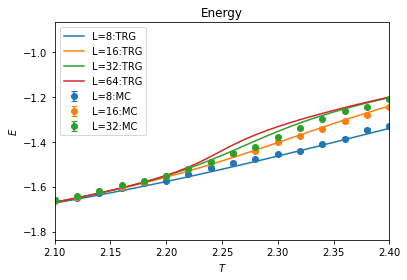

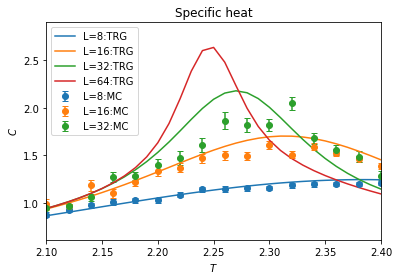

In [23]:
## plot observables

pyplot.figure()
pyplot.title("Energy")
pyplot.xlabel("$T$")
pyplot.ylabel("$E$")

cmap = pyplot.get_cmap("tab10")

for i in range(len(L_list_mc)):
    pyplot.errorbar(T_list_all_mc[i],Ene_all_mc[i],yerr=np.array(Ene_err_all_mc[i]),capsize=3,fmt="o",color=cmap(i),label = "L="+repr(L_list_mc[i])+":MC")
for i in range(len(L_list_trg)):
    pyplot.plot(T_cut_all_trg[i],E_all_trg[i],"-",color=cmap(i),label = "L="+repr(L_list_trg[i])+":TRG")    
pyplot.xlim([T_min,T_max])
## If you need, please set following ylim propery or commet out it
pyplot.ylim([-0.1 + min(Ene_all_mc[0]),0.1 + max(E_all_trg[len(L_list_trg)-1])])
pyplot.legend()

pyplot.figure()
pyplot.title("Specific heat")
pyplot.xlabel("$T$")
pyplot.ylabel("$C$")
for i in range(len(L_list_mc)):
    pyplot.errorbar(T_list_all_mc[i],C_all_mc[i],yerr=np.array(C_err_all_mc[i]),capsize=3,fmt="o",color=cmap(i),label = "L="+repr(L_list_mc[i])+":MC")
for i in range(len(L_list_trg)):
    pyplot.plot(T_cut_all_trg[i],C_all_trg[i],"-",color=cmap(i),label = "L="+repr(L_list_trg[i])+":TRG")
pyplot.xlim([T_min,T_max])
## If you need, please set following ylim propery or commet out it
pyplot.ylim([0.8*min(C_all_mc[0]),1.1*max(C_all_trg[len(L_list_trg)-1])])
pyplot.legend()